# Mobility Data 07/2020 MUNICIPIOS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

## Maestra1 (per person)

In [ ]:
# # unzip
# path_mes = 'maestra1/municipios/202006_maestra1_mitma_municipio.tar'
# # df_mes = pd.read_csv(path_mes, compression='infer', header=0, sep='|', quotechar='"', error_bad_lines=False)
# import tarfile

# with tarfile.open(path_mes, "r") as tf:
#     print("Opened tarfile")
#     tf.extractall(path="./extraction_dir")
#     print("All files extracted")
#     # df_mes = pd.read_csv(tf, compression='infer', header=0, sep='|', quotechar='"', error_bad_lines=False)

In [3]:
df = pd.DataFrame([])
# days from 1 to 9
for i in range(1,10):
    path = f'maestra1/municipios/dias/2020060{i}_maestra_1_mitma_municipio.txt.gz'
    df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
    df1 = df1.rename(columns={'fecha': 'day'})
    df1['day'] = i
    df = pd.concat([df, df1], ignore_index=True)
df.info()

/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/2852021291.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/2852021291.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/2852021291.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0p

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12561485 entries, 0 to 12561484
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   day        int64  
 1   origen     object 
 2   destino    object 
 3   periodo    int64  
 4   distancia  object 
 5   viajes     float64
 6   viajes_km  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 670.9+ MB


In [4]:
# days from 10 to 30
for i in range(10,31):
    path = f'maestra1/municipios/dias/202006{i}_maestra_1_mitma_municipio.txt.gz'
    df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
    df1 = df1.rename(columns={'fecha': 'day'})
    df1['day'] = i
    df = pd.concat([df, df1], ignore_index=True)
df.info()

/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/103271253.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/103271253.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/103271253.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44753806 entries, 0 to 44753805
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   day        int64  
 1   origen     object 
 2   destino    object 
 3   periodo    int64  
 4   distancia  object 
 5   viajes     float64
 6   viajes_km  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.3+ GB


Periodo: hour of the day

Distancia: 

In [7]:
print(df.head(15))
print(df.info())

    day    origen   destino  periodo distancia  viajes  viajes_km
0     1  01001_AM  01001_AM        0   002-005  31.904    147.625
1     1  01001_AM  01001_AM        0   005-010  29.294    195.605
2     1  01001_AM  01001_AM        0   010-050  18.305    225.574
3     1  01001_AM  01001_AM        1   002-005  17.785     72.211
4     1  01001_AM  01001_AM        1   005-010  21.103    160.270
5     1  01001_AM  01001_AM        1   010-050   6.431     85.739
6     1  01001_AM  01001_AM        2   005-010  36.193    230.276
7     1  01001_AM  01001_AM        2   010-050  18.942    240.128
8     1  01001_AM  01001_AM        3   005-010  23.416    158.227
9     1  01001_AM  01001_AM        3   010-050   4.634     47.114
10    1  01001_AM  01001_AM        4   002-005  34.118    114.821
11    1  01001_AM  01001_AM        4   005-010  26.819    200.161
12    1  01001_AM  01001_AM        4   010-050  28.303    403.410
13    1  01001_AM  01001_AM        5   002-005  18.709     70.764
14    1  0

In [6]:
df['distancia'].unique()

array(['002-005', '005-010', '010-050', '0005-002', '050-100', '100+'],
      dtype=object)

In [ ]:
# add variable weekends
df['weekend'] = [0 for _ in range(len(df))]
weekdays = [6, 13, 20, 27, 7, 14, 21, 28]
cond = df['day'].isin(weekdays)
df.loc[cond, 'weekend'] = 1

Now plot number of internal/external travels for the 10 most popolous municipalities:

TODO: infer spanish habits. which hour of the day most viajes done? plot avg number viajes per hour


In [28]:
# divide between workdays and weekends:
df_weekend = df[df['day'].isin(weekdays)].groupby(['day', 'periodo']).sum()
hours = df['periodo'].unique()

# df_weekend = df_weekend.groupby(['periodo']).mean()
# avgs_weekend = df_weekend['viajes'].values
print(df_weekend.groupby(level=['periodo']).mean())

               viajes     viajes_km    weekend   external
periodo                                                  
0        3.517493e+06  2.019656e+07  46129.625  40592.375
1        2.601524e+06  1.477113e+07  40005.875  34749.875
2        1.908620e+06  1.147486e+07  35280.750  30345.875
3        1.489728e+06  1.000203e+07  32889.375  28178.250
4        1.326195e+06  1.068172e+07  33460.375  28859.500
5        1.494996e+06  1.455716e+07  38932.125  34229.250
6        1.893628e+06  2.030220e+07  45511.375  40477.375
7        2.434703e+06  2.615019e+07  51964.750  46653.500
8        3.084784e+06  3.252369e+07  58255.000  52696.250
9        3.914856e+06  4.016336e+07  64530.000  58751.875
10       4.725860e+06  4.765166e+07  70296.625  64383.750
11       5.495989e+06  5.410288e+07  75001.000  68981.125
12       6.002504e+06  5.615744e+07  76302.375  70228.250
13       6.118277e+06  5.392101e+07  73838.000  67730.875
14       5.232817e+06  4.580055e+07  67442.750  61458.250
15       4.456

In [29]:
# # check if operations are correct!!!
# d = {'day': [1,1,2,2,3,3,3], 'hour': [11,11,11,12,11,12,11], 'value': [1,2,3,3,2,3,1], 'random':['dio', 'porco','dio', 'porco', 'dio', 'porco', 'io']}
# dataframe = pd.DataFrame(data=d)
# dataframe1 = dataframe.groupby(['day', 'hour']).sum()
# dataframe2 = dataframe1.groupby(level='hour').mean()
# print(dataframe2.head())
# dataframe1 = df.groupby(['day', 'periodo']).sum()
# print(dataframe1.head())
# x = dataframe1.groupby(level=['periodo']).mean()['viajes'].values
# print(avgs_work - x)


In [30]:
df_weekend1 = df_weekend.groupby(level=['periodo']).mean()
avgs_weekend = df_weekend1['viajes'].values
print(df_weekend1.head())

               viajes     viajes_km    weekend   external
periodo                                                  
0        3.517493e+06  2.019656e+07  46129.625  40592.375
1        2.601524e+06  1.477113e+07  40005.875  34749.875
2        1.908620e+06  1.147486e+07  35280.750  30345.875
3        1.489728e+06  1.000203e+07  32889.375  28178.250
4        1.326195e+06  1.068172e+07  33460.375  28859.500


In [31]:
df_work = df[~df['day'].isin(weekdays)].groupby(['day', 'periodo']).sum()
df_work = df_work.groupby(level=['periodo']).mean()
avgs_work = df_work['viajes'].values

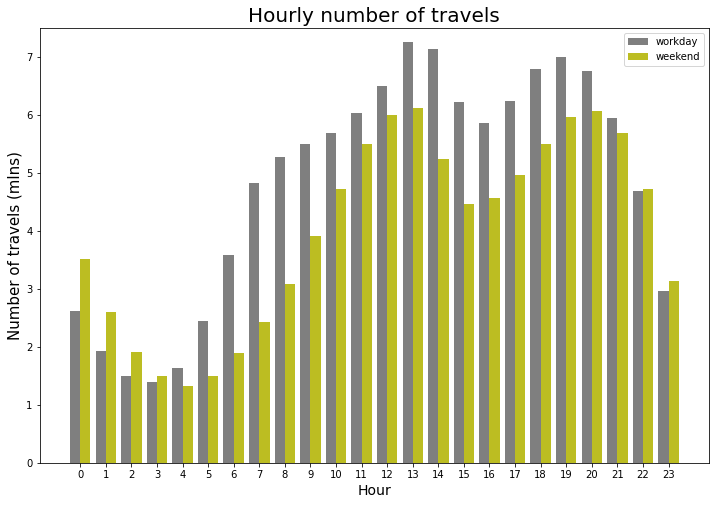

In [32]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(hours))
  
plt.bar(X_axis - 0.2, avgs_work*1e-6, 0.4, label = 'workday', color='tab:grey')
plt.bar(X_axis + 0.2, avgs_weekend*1e-6, 0.4, color='tab:olive', label='weekend')
plt.xlabel('Hour', fontsize=14)
plt.xticks(hours)
plt.ylabel('Number of travels (mlns)', fontsize=15)
plt.title('Hourly number of travels', fontsize=20)
plt.legend()
plt.ylim(top=7.5)

plt.show()

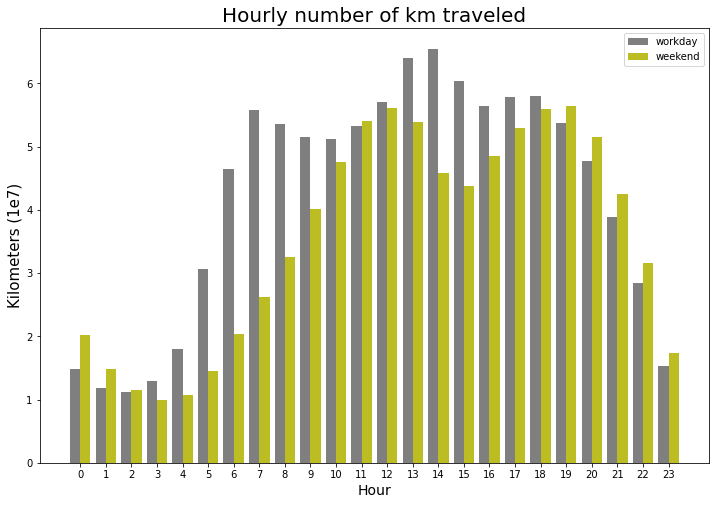

In [33]:
# same with viajes_km
avgs_weekend = df_weekend1['viajes_km'].values
avgs_work = df_work['viajes_km'].values
plt.figure(figsize=(12,8))
X_axis = np.arange(len(hours))
  
plt.bar(X_axis - 0.2, avgs_work*1e-7, 0.4, label = 'workday', color='tab:grey')
plt.bar(X_axis + 0.2, avgs_weekend*1e-7, 0.4, color='tab:olive', label='weekend')
plt.xlabel('Hour', fontsize=14)
plt.xticks(hours)
plt.ylabel('Kilometers (1e7)', fontsize=15)
plt.title('Hourly number of km traveled', fontsize=20)
plt.legend()

plt.show()

TODO: use distancia label encoder, find which travels are internal/external

In [34]:
group_distancia = df.groupby(['distancia', 'day']).sum()
print(group_distancia.head())

               periodo        viajes     viajes_km  weekend  external
distancia day                                                        
0005-002  1    1019148  3.836383e+07  4.551382e+07        0     47982
          2    1022750  3.925588e+07  4.655733e+07        0     48475
          3    1021510  3.907852e+07  4.637213e+07        0     48352
          4    1016425  3.876002e+07  4.600749e+07        0     48267
          5    1028134  4.056766e+07  4.819318e+07        0     48541


In [35]:
group_distancia.info()
# print(distances)
# for g in distances:
#     df_g = group_distancia.get_group(g)
group_distancia.loc[('100+', 1)]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 180 entries, ('0005-002', 1) to ('100+', 30)
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   periodo    180 non-null    int64  
 1   viajes     180 non-null    float64
 2   viajes_km  180 non-null    float64
 3   weekend    180 non-null    int64  
 4   external   180 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.8+ KB


periodo      7.646180e+05
viajes       6.169966e+05
viajes_km    1.327108e+08
weekend      0.000000e+00
external     6.824800e+04
Name: (100+, 1), dtype: float64

In [36]:
print(df.iloc[0:15])

    day    origen   destino  periodo distancia  viajes  viajes_km  weekend  \
0     1  01001_AM  01001_AM        0   002-005  31.904    147.625        0   
1     1  01001_AM  01001_AM        0   005-010  29.294    195.605        0   
2     1  01001_AM  01001_AM        0   010-050  18.305    225.574        0   
3     1  01001_AM  01001_AM        1   002-005  17.785     72.211        0   
4     1  01001_AM  01001_AM        1   005-010  21.103    160.270        0   
5     1  01001_AM  01001_AM        1   010-050   6.431     85.739        0   
6     1  01001_AM  01001_AM        2   005-010  36.193    230.276        0   
7     1  01001_AM  01001_AM        2   010-050  18.942    240.128        0   
8     1  01001_AM  01001_AM        3   005-010  23.416    158.227        0   
9     1  01001_AM  01001_AM        3   010-050   4.634     47.114        0   
10    1  01001_AM  01001_AM        4   002-005  34.118    114.821        0   
11    1  01001_AM  01001_AM        4   005-010  26.819    200.16

Plot time series for each category of 'distancia':

In [37]:
df_work = df[~df['day'].isin(weekdays)].groupby(['day', 'periodo', 'distancia']).sum()
df_work = df_work.groupby(level=['periodo', 'distancia'] ).mean()

In [38]:
# # proof that calculations were right
# print(df_work.groupby(level=['periodo'] ).sum()['viajes'].values)
# print(avgs_work)

In [39]:
print(df_work.head())

                         viajes     viajes_km  weekend      external
periodo distancia                                                   
0       0005-002   1.170493e+06  1.365058e+06      0.0   1907.954545
        002-005    7.358067e+05  2.351090e+06      0.0   5492.090909
        005-010    4.096664e+05  2.882489e+06      0.0   9132.227273
        010-050    2.846550e+05  5.063306e+06      0.0  15295.590909
        050-100    1.384953e+04  9.266733e+05      0.0   1517.409091


In [40]:
df['distancia'].unique()

array(['002-005', '005-010', '010-050', '0005-002', '050-100', '100+'],
      dtype=object)

In [41]:
# create dictionary of distancia
dist_category = df['distancia'].unique()
prop_dict = dict.fromkeys(hours, None)
for j in hours:
    df_hour = df_work.loc[j,:]
    prop = []
    # for each hour save a list of 6 values, representing the travels in each of the 6 categories
    for i in dist_category:
        l = df_hour.loc[i]['viajes']
        prop.append(l)
    prop_dict[j] = prop

24


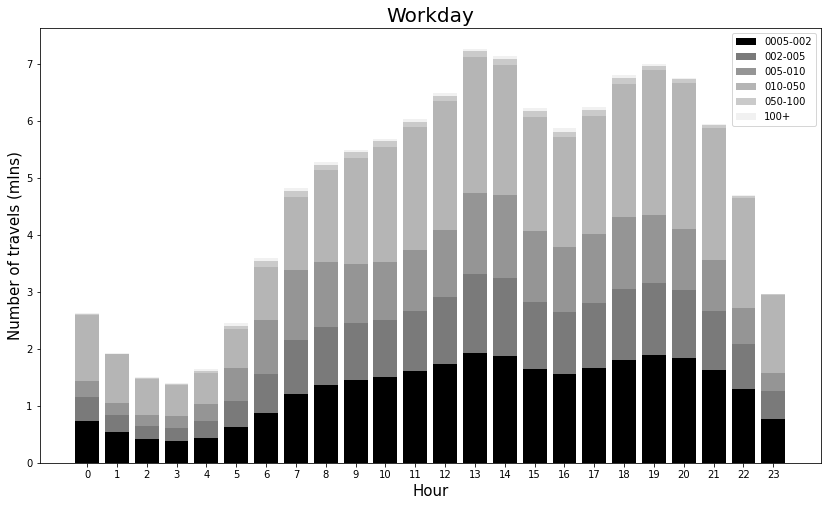

In [42]:
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
for d in hours:
    zero.append(prop_dict[d][0]*1e-6)
    one.append(prop_dict[d][1]*1e-6)
    two.append(prop_dict[d][2]*1e-6)
    three.append(prop_dict[d][3]*1e-6)
    four.append(prop_dict[d][4]*1e-6)
    five.append(prop_dict[d][5]*1e-6)
print(len(four))

b_two = list(np.add(zero, one))
b_three = list(np.add(b_two, two))
b_four = list(np.add(b_three, three))
b_five =  list(np.add(b_four, four))
b_six =  list(np.add(b_five, five))


c = np.arange(1, 6 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greys)
cmap.set_array([])


plt.figure(figsize=(14,8))
plt.bar(hours, zero, label='0005-002', color = cmap.to_rgba(6))
plt.bar(hours, one, bottom=zero, label='002-005', color=cmap.to_rgba(4))
plt.bar(hours, two, bottom=b_two, label='005-010', color=cmap.to_rgba(3.5))
plt.bar(hours, three, bottom=b_three, label='010-050', color=cmap.to_rgba(3))
plt.bar(hours, four, bottom=b_four, label='050-100', color=cmap.to_rgba(2.6))
plt.bar(hours, five, bottom=b_five, label='100+', color=cmap.to_rgba(1.6))


plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of travels (mlns)', fontsize=15)
plt.legend()
plt.title('Workday', fontsize=20)
plt.xticks(hours)
plt.savefig('figures/number_travels_hist.png')
plt.show()

24


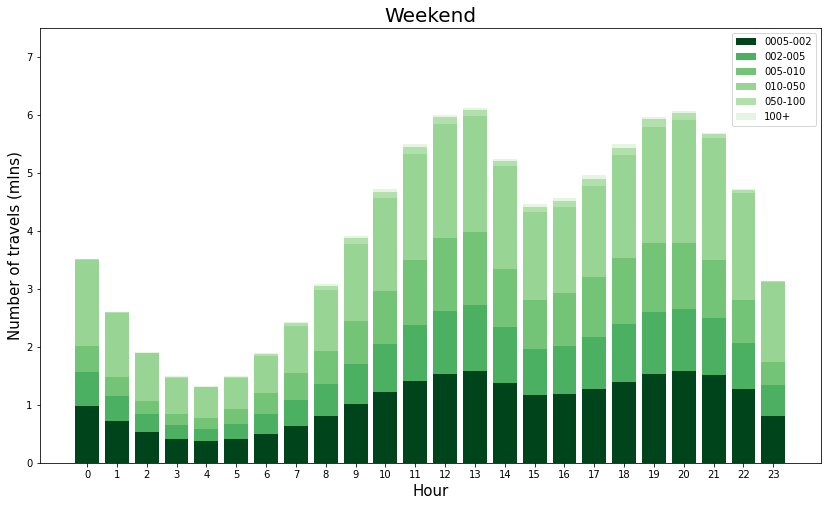

In [43]:
# same for weekends:
df_weekend = df[df['day'].isin(weekdays)].groupby(['day', 'periodo', 'distancia']).sum()
df_weekend  = df_weekend .groupby(level=['periodo', 'distancia'] ).mean()
# create dictionary of distancia
prop_dict = dict.fromkeys(hours, None)
for j in hours:
    df_hour = df_weekend.loc[j,:]
    prop = []
    # for each hour save a list of 6 values, representing the travels in each of the 6 categories
    for i in dist_category:
        l = df_hour.loc[i]['viajes']
        prop.append(l)
    prop_dict[j] = prop
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
for d in hours:
    zero.append(prop_dict[d][0]*1e-6)
    one.append(prop_dict[d][1]*1e-6)
    two.append(prop_dict[d][2]*1e-6)
    three.append(prop_dict[d][3]*1e-6)
    four.append(prop_dict[d][4]*1e-6)
    five.append(prop_dict[d][5]*1e-6)
print(len(four))

b_two = list(np.add(zero, one))
b_three = list(np.add(b_two, two))
b_four = list(np.add(b_three, three))
b_five =  list(np.add(b_four, four))
b_six =  list(np.add(b_five, five))


c = np.arange(1, 6 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
cmap.set_array([])


plt.figure(figsize=(14,8))
plt.bar(hours, zero, label='0005-002', color = cmap.to_rgba(6))
plt.bar(hours, one, bottom=zero, label='002-005', color=cmap.to_rgba(4))
plt.bar(hours, two, bottom=b_two, label='005-010', color=cmap.to_rgba(3.5))
plt.bar(hours, three, bottom=b_three, label='010-050', color=cmap.to_rgba(3))
plt.bar(hours, four, bottom=b_four, label='050-100', color=cmap.to_rgba(2.6))
plt.bar(hours, five, bottom=b_five, label='100+', color=cmap.to_rgba(1.6))


plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of travels (mlns)', fontsize=15)
plt.legend()
plt.title('Weekend', fontsize=20)
plt.xticks(hours)
plt.ylim(top=7.5)
plt.savefig('figures/number_travels_hist.png')
plt.show()

Now do the averages by hour and cosider daily time series:

In [44]:
df_series = df.groupby(['day', 'distancia']).sum()
df_series.head()

periodo        viajes     viajes_km  weekend  external
day distancia                                                        
1   0005-002   1019148  3.836383e+07  4.551382e+07        0     47982
    002-005    2241843  2.872986e+07  9.306125e+07        0    142897
    005-010    3663136  1.933333e+07  1.376809e+08        0    264085
    010-050    8066432  1.890788e+07  3.635191e+08        0    633179
    050-100    1397837  1.334207e+06  8.926232e+07        0    117544

30


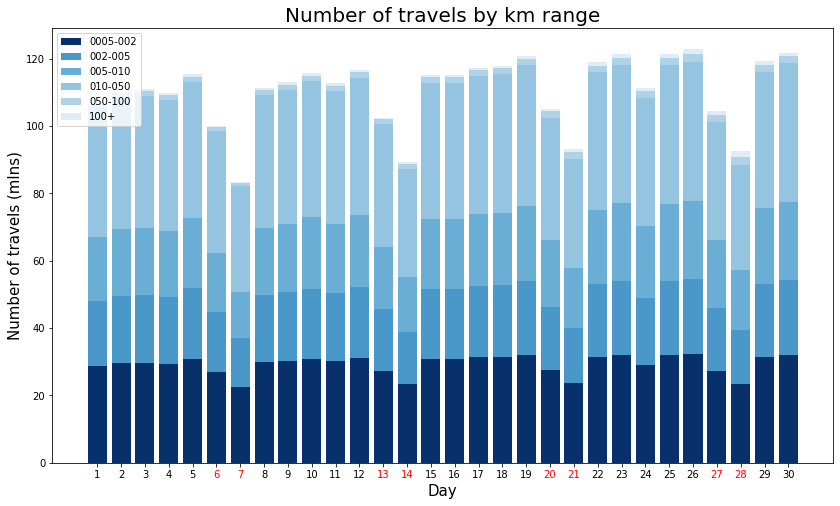

In [45]:
# create dictionary of distancia
days = df['day'].unique()
prop_dict = dict.fromkeys(days, None)
for j in days:
    df_day = df_series.loc[j,:]
    prop = []
    # for each hour save a list of 6 values, representing the travels in each of the 6 categories
    for i in dist_category:
        l = df_day.loc[i]['viajes']
        prop.append(l)
    prop_dict[j] = prop
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
for d in days:
    zero.append(prop_dict[d][0]*1e-6)
    one.append(prop_dict[d][1]*1e-6)
    two.append(prop_dict[d][2]*1e-6)
    three.append(prop_dict[d][3]*1e-6)
    four.append(prop_dict[d][4]*1e-6)
    five.append(prop_dict[d][5]*1e-6)
print(len(four))

b_two = list(np.add(zero, one))
b_three = list(np.add(b_two, two))
b_four = list(np.add(b_three, three))
b_five =  list(np.add(b_four, four))
b_six =  list(np.add(b_five, five))


c = np.arange(1, 6 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])



fig, ax = plt.subplots(figsize=(14,8))
ax.bar(days, zero, label='0005-002', color = cmap.to_rgba(6))
ax.bar(days, one, bottom=zero, label='002-005', color=cmap.to_rgba(4))
ax.bar(days, two, bottom=b_two, label='005-010', color=cmap.to_rgba(3.5))
ax.bar(days, three, bottom=b_three, label='010-050', color=cmap.to_rgba(3))
ax.bar(days, four, bottom=b_four, label='050-100', color=cmap.to_rgba(2.6))
ax.bar(days, five, bottom=b_five, label='100+', color=cmap.to_rgba(1.6))


ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of travels (mlns)', fontsize=15)
plt.legend(loc='upper left')
ax.set_title('Number of travels by km range', fontsize=20)
ax.set_xticks(days)
for i in weekdays:
    ax.get_xticklabels()[i-1].set_color("red")
plt.show()

<Figure size 864x576 with 0 Axes>

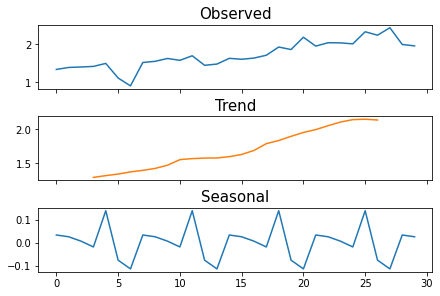

In [46]:
result = seasonal_decompose(four, model='additive', period=7)

plt.figure(figsize=(12,8))
fig, axs = plt.subplots(3, sharex=True, constrained_layout = True)
axs[0].plot(four)
axs[0].set_title('Observed', fontsize=15)
axs[1].plot(result.trend, color='tab:orange')
axs[1].set_title('Trend', fontsize=15)
axs[2].plot(result.seasonal)
axs[2].set_title('Seasonal', fontsize=15)
plt.show()

## Maestra2 (per group of people)

In [47]:
# # unzip
# path_mes = 'maestra2/202006_maestra2_mitma_municipio.tar'
# # df_mes = pd.read_csv(path_mes, compression='infer', header=0, sep='|', quotechar='"', error_bad_lines=False)
# import tarfile

# with tarfile.open(path_mes, "r") as tf:
#     print("Opened tarfile")
#     tf.extractall(path="./extraction_dir")
#     print("All files extracted")
#     # df_mes = pd.read_csv(tf, compression='infer', header=0, sep='|', quotechar='"', error_bad_lines=False)

Load and merge the daily data altogether:

In [12]:
df2 = pd.DataFrame([])
# days from 1 to 10
for i in range(1,10):
    path = f'maestra2/municipios/2020060{i}_maestra_2_mitma_municipio.txt.gz'
    df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
    df1 = df1.rename(columns={'fecha': 'day'})
    df1['day'] = i
    df2 = pd.concat([df2, df1], ignore_index=True)
df2.info()

/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/1291155889.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/1291155889.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/1291155889.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0p

/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/1291155889.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/1291155889.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78832 entries, 0 to 78831
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            78832 non-null  int64  
 1   distrito       78832 non-null  object 
 2   numero_viajes  78832 non-null  object 
 3   personas       78832 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [13]:
# days from 10 to 30
for i in range(10,31):
    path = f'maestra2/municipios/202006{i}_maestra_2_mitma_municipio.txt.gz'
    df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
    df1 = df1.rename(columns={'fecha': 'day'})
    df1['day'] = i
    df2 = pd.concat([df2, df1], ignore_index=True)
df2.info()

/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/928495675.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/928495675.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdzgxgtph0000gq/T/ipykernel_1643/928495675.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv(path, compression='gzip', header=0, sep='|', quotechar='"', error_bad_lines=False)
/var/folders/d3/rdvhjvc52n99n0pgdz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262804 entries, 0 to 262803
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            262804 non-null  int64  
 1   distrito       262804 non-null  object 
 2   numero_viajes  262804 non-null  object 
 3   personas       262804 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.0+ MB


Add boolean variable weekend and change distritos into municipios:

In [14]:
df2['weekend'] = [0 for _ in range(len(df2))]
weekdays = [6, 13, 20, 27, 7, 14, 21, 28]
cond = df2['day'].isin(weekdays)
df2.loc[cond, 'weekend'] = 1

In [15]:
df2 = df2.rename({'distrito': 'municipio'}, axis=1)

In [16]:
print(df2.info()) # no missing values
#check for duplicates
df2.duplicated().sum()
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262804 entries, 0 to 262803
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            262804 non-null  int64  
 1   municipio      262804 non-null  object 
 2   numero_viajes  262804 non-null  object 
 3   personas       262804 non-null  float64
 4   weekend        262804 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 10.0+ MB
None
   day municipio numero_viajes  personas  weekend
0    1  01001_AM             0  3471.255        0
1    1  01001_AM             1   400.354        0
2    1  01001_AM             2  2071.065        0
3    1  01001_AM            2+  3066.499        0
4    1     01002             0  3989.251        0


How many people are considered? 46,450,000

In [53]:
cond = df2['day']==12
df2.loc[cond, 'personas'].sum()

46455277.93399999

Proportion of people who traveled 0,1,2,2+ times during each day:

In [99]:
# create dictionary of proportions
n_viajes = df2['numero_viajes'].unique()
days = [i for i in range(1,31)]
prop_dict = dict.fromkeys(days, None)
for j in days:
    df_day = df2.loc[df2['day']==j]
    prop = []
    for i in n_viajes:
        cond = df_day['numero_viajes']==i
        prop.append(df_day.loc[cond, 'personas'].sum())
    prop_dict[j] = prop


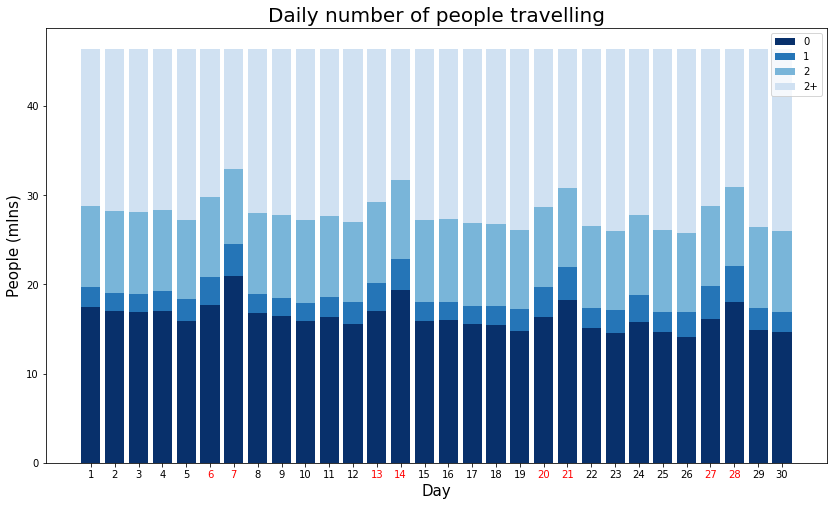

In [101]:
zero = []
one = []
two = []
two_plus = []
for d in days:
    zero.append(prop_dict[d][0]*1e-6)
    one.append(prop_dict[d][1]*1e-6)
    two.append(prop_dict[d][2]*1e-6)
    two_plus.append(prop_dict[d][3]*1e-6)
b_two = list(np.add(zero, one))
b_two_plus = list(np.add(b_two, two))

c = np.arange(1, 4 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])



fig, ax = plt.subplots(figsize=(14,8))
ax.bar(days, zero, label='0', color = cmap.to_rgba(6))
ax.bar(days, one, bottom=zero, label='1', color=cmap.to_rgba(3.2))
ax.bar(days, two, bottom=b_two, label='2', color=cmap.to_rgba(2.4))
ax.bar(days, two_plus, bottom=b_two_plus, label='2+', color=cmap.to_rgba(1.6))


ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('People (mlns)', fontsize=15)
plt.legend()
ax.set_title('Daily number of people travelling', fontsize=20)
ax.set_xticks(days)
for i in weekdays:
    ax.get_xticklabels()[i-1].set_color("red")
plt.show()

<Figure size 864x576 with 0 Axes>

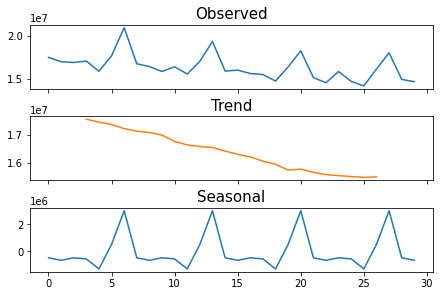

In [56]:
result = seasonal_decompose(zero, model='additive', period=7)

plt.figure(figsize=(12,8))
fig, axs = plt.subplots(3, sharex=True, constrained_layout = True)
axs[0].plot(zero)
axs[0].set_title('Observed', fontsize=15)
axs[1].plot(result.trend, color='tab:orange')
axs[1].set_title('Trend', fontsize=15)
axs[2].plot(result.seasonal)
axs[2].set_title('Seasonal', fontsize=15)
plt.show()

Boxplot of number of travels (ignoring the municipio):

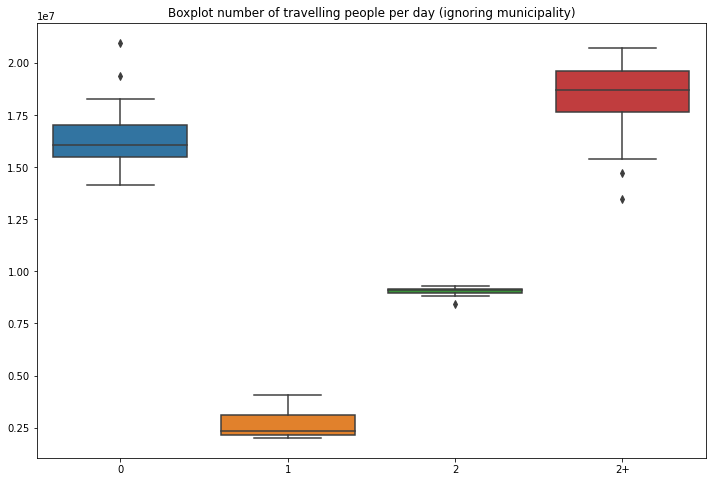

In [57]:
data = []
for d in days:
    x = prop_dict[d]
    data.append(x)
data = pd.DataFrame(data, columns = ['0', '1', '2', '2+'])
plt.figure(figsize=(12,8))
sns.boxplot(data)
plt.title('Boxplot number of travelling people per day (ignoring municipality)')
plt.show()

Differentiate between weekend or not:

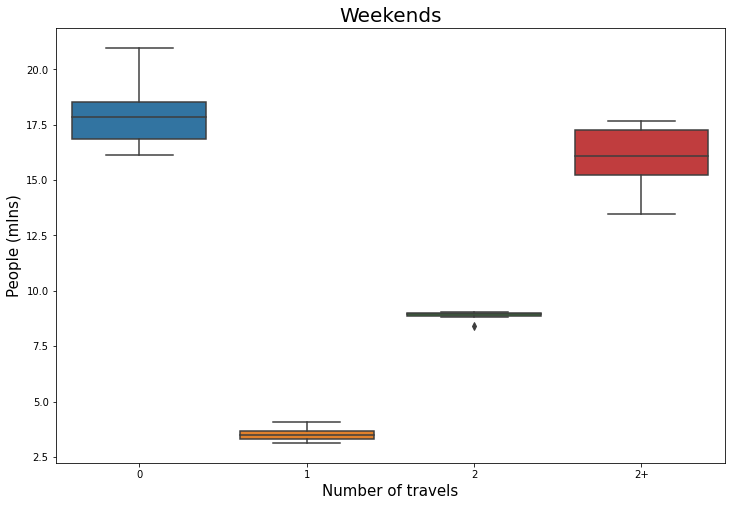

In [58]:
data_weekend = []
for d in days:
    if d in weekdays:
        x = [i*1e-6 for i in prop_dict[d]]
        data_weekend.append(x)
data_weekend = pd.DataFrame(data_weekend, columns = ['0', '1', '2', '2+'])
plt.figure(figsize=(12,8))
sns.boxplot(data_weekend)
plt.title('Weekends', fontsize=20)
plt.xlabel('Number of travels', fontsize=15)
plt.ylabel('People (mlns)', fontsize=15)
plt.show()

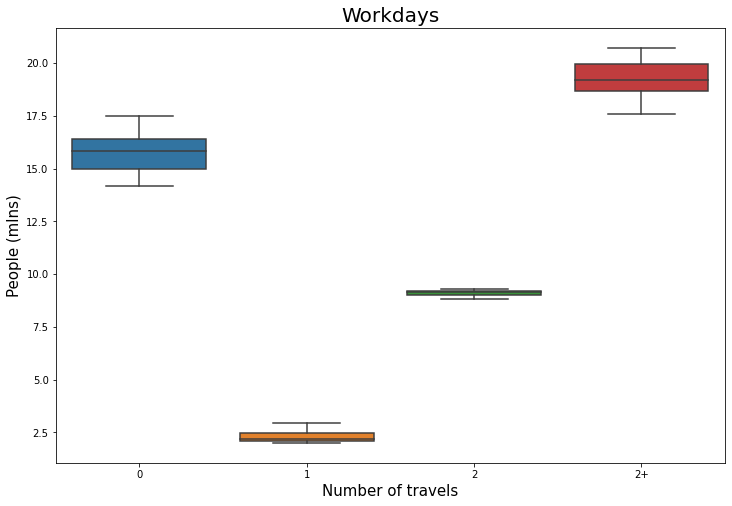

In [59]:
data = []
for d in days:
    if d not in weekdays:
        x = [i*1e-6 for i in prop_dict[d]]
        data.append(x)
data = pd.DataFrame(data, columns = ['0', '1', '2', '2+'])
plt.figure(figsize=(12,8))
sns.boxplot(data)
plt.title('Workdays', fontsize=20)
plt.xlabel('Number of travels', fontsize=15)
plt.ylabel('People (mlns)', fontsize=15)
plt.show()

In [60]:
print(data_weekend.mean().values)
print(data.mean().values)

[17.99087468  3.49904746  8.88811573 16.03727991]
[15.7702326   2.27995498  9.11218063 19.2726102 ]


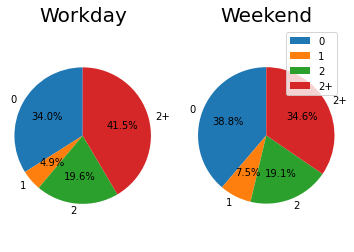

In [61]:
# Pie chart of the population divided in weekends or not
# where the slices will be ordered and plotted counter-clockwise:
labels = ['0', '1', '2', '2+']
size_weekend = data_weekend.mean().values
size_work = data.mean().values
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice

fig, ax = plt.subplots(1,2)
ax[1].pie(size_weekend, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Weekend', fontsize=20)
ax[0].pie(size_work, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Workday', fontsize=20)
plt.legend()
plt.show()

Sort the municipalities w.r.t. the number of people and take the 10 most populous:

Number of municipalities: 2186
Number of people in each municipality: [ 9009.173 10273.544  6470.919 ...  5662.869 83134.436 81229.816]
Most populated municipalities: ['28079' '08019' '46250' '41091' '50297' '29067' '30030' '07040' '35016'
 '48020'] and their population [2.99618946 1.53280741 0.73114295 0.64507061 0.64392554 0.54934492
 0.41993833 0.39058316 0.3751612  0.32980363]


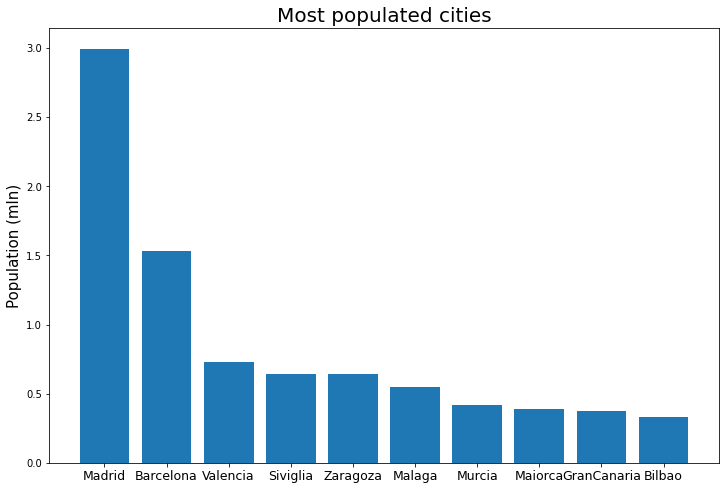

In [62]:
municipios = df2.loc[df2['day']==1, 'municipio'].unique()
print(f'Number of municipalities: {len(municipios)}')

# use day 1 to calculate the population in each municipality
df_muni = df2.loc[df2['day']==1].groupby(by='municipio').sum()
n = df_muni['personas'].values
print(f'Number of people in each municipality: {n}')
index = np.argsort(n)[::-1][:10]
best_muni = municipios[index]
best_names = ['Madrid', 'Barcelona', 'Valencia', 'Siviglia', 'Zaragoza', 'Malaga', 'Murcia', 'Maiorca', 'GranCanaria', 'Bilbao']
best_pop = n[index]*1e-6
print(f'Most populated municipalities: {best_muni} and their population {best_pop}')
plt.figure(figsize = (12,8))
plt.bar(best_names, best_pop)
plt.ylabel('Population (mln)', fontsize=15)
plt.xticks(fontsize=12.5)
plt.title('Most populated cities', fontsize=20)
plt.show()

Behaviour of different cities in mobility (average number of travels):

In [ ]:
city_dict = dict.fromkeys(best_names, None)
x = df2['numero_viajes'].unique()
for i in range(len(best_muni)):
    name = best_names[i]
    print(f'City: {name}')
    m = best_muni[i]
    df_muni = df2.loc[df2['municipio']==m] 
    df_muni['personas'] = df_muni['personas']/best_pop[i]
    tmp = df_muni.groupby(by='numero_viajes').mean()
    tmp['personas'] = tmp['personas']/tmp['personas'].sum()
    print(tmp.head())
    plt.figure(figsize=(12,8))
    plt.bar(x, tmp['personas'].values)
    plt.show()
    city_dict[name] = tmp['personas']

Proportion of number of viajes per city (most popolous):

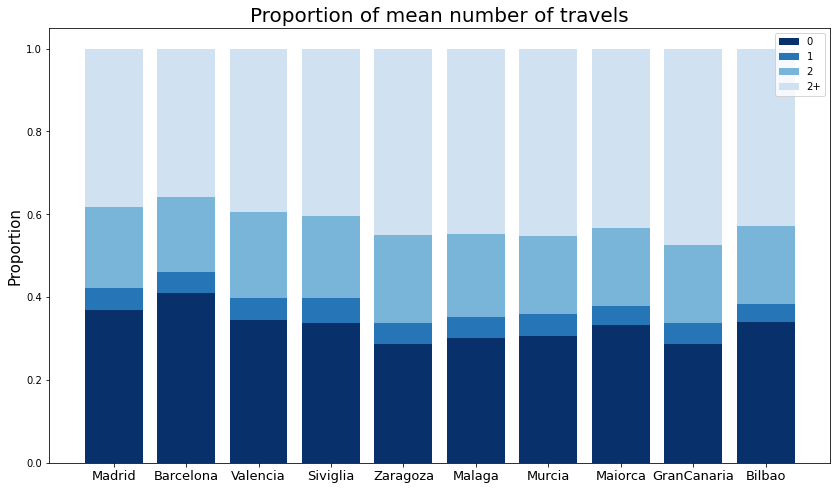

In [64]:
zero = []
one = []
two = []
two_plus = []
for d in best_names:
    zero.append(city_dict[d][0])
    one.append(city_dict[d][1])
    two.append(city_dict[d][2])
    two_plus.append(city_dict[d][3])
b_two = list(np.add(zero, one))
b_two_plus = list(np.add(b_two, two))

c = np.arange(1, 4 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])


plt.figure(figsize=(14,8))
plt.bar(best_names, zero, label='0', color = cmap.to_rgba(6))
plt.bar(best_names, one, bottom=zero, label='1', color=cmap.to_rgba(3.2))
plt.bar(best_names, two, bottom=b_two, label='2', color=cmap.to_rgba(2.4))
plt.bar(best_names, two_plus, bottom=b_two_plus, label='2+', color=cmap.to_rgba(1.6))
plt.ylabel('Proportion', fontsize=15)
plt.legend()
plt.title('Proportion of mean number of travels', fontsize=20)
plt.xticks(best_names, fontsize=13)
plt.savefig('figures/mean_travels_city_hist.png')
plt.show()

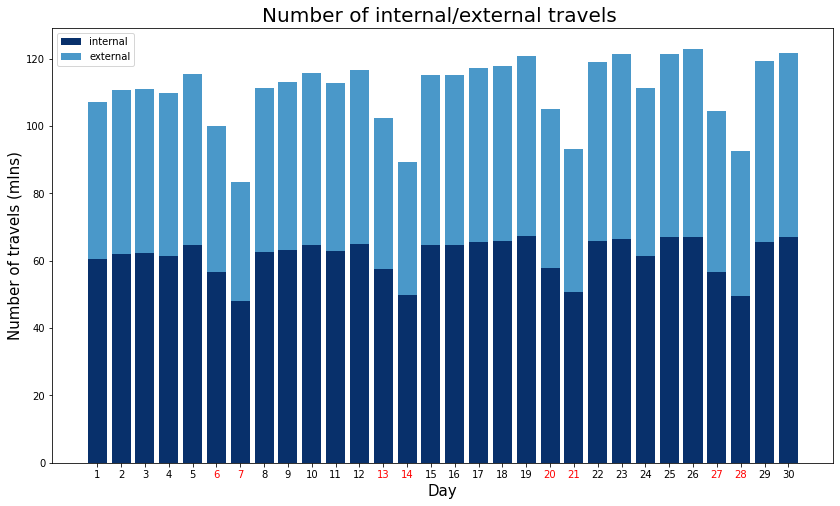

In [65]:
# Add variable 'external' (if the travel is internal or external):
# TODO: When origen!=destino, which are the most popular destinations? how many internal travels? how many external?
v = 1*(df['origen']!=df['destino']).values
df['external'] = v
df.head()
df_int = df.groupby(['day', 'external']).sum()
# create dictionary of distancia
days = df['day'].unique()
category = df['external'].unique()
prop_dict = dict.fromkeys(days, None)
for j in days:
    df_day = df_int.loc[j,:]
    prop = []
    # for each hour save a list of 6 values, representing the travels in each of the 6 categories
    for i in category:
        l = df_day.loc[i]['viajes']
        prop.append(l)
    prop_dict[j] = prop
zero = []
one = []
for d in days:
    zero.append(prop_dict[d][0]*1e-6)
    one.append(prop_dict[d][1]*1e-6)

b_two = list(np.add(zero, one))
c = np.arange(1, 6 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(days, zero, label='internal', color = cmap.to_rgba(6))
ax.bar(days, one, bottom=zero, label='external', color=cmap.to_rgba(4))

ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of travels (mlns)', fontsize=15)
plt.legend(loc='upper left')
ax.set_title('Number of internal/external travels ', fontsize=20)
ax.set_xticks(days)
for i in weekdays:
    ax.get_xticklabels()[i-1].set_color("red")
plt.show()

Now plot daily average of viajes int/ext in the most popolous cities:

In [80]:
best_muni

array(['28079', '08019', '46250', '41091', '50297', '29067', '30030',
       '07040', '35016', '48020'], dtype=object)

In [86]:
df_city = df.loc[df['origen'].isin(best_muni)]

In [87]:
df_city = df_city.groupby(['origen', 'external', 'day']).sum()

In [88]:
df_city.head()

periodo      viajes    viajes_km  weekend
origen external day                                           
07040  0        1       1161  851550.424  2435162.131        0
                2       1151  862359.760  2470017.297        0
                3       1221  882486.627  2519590.993        0
                4       1175  852768.910  2406575.498        0
                5       1180  911142.015  2593041.488        0

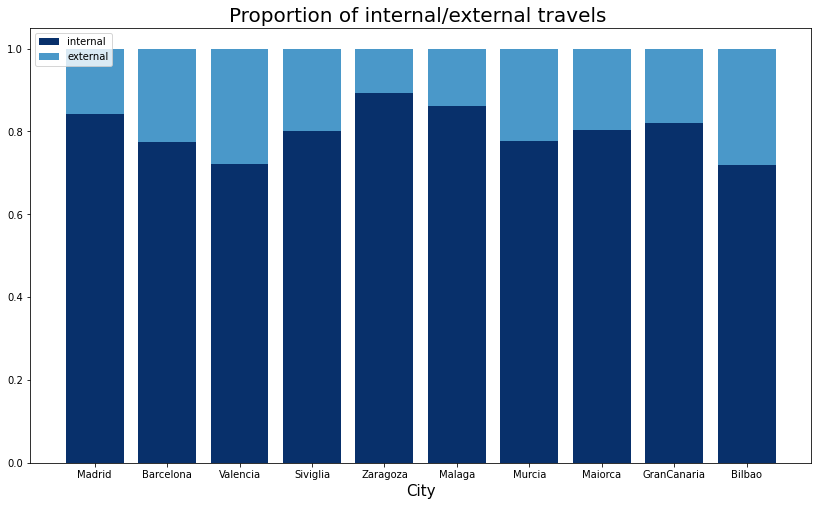

In [94]:
prop_dict = dict.fromkeys(best_muni, None)
for code in best_muni:
    m = []
    for c in category:
        df_tmp = df_city.loc[code, c, :]
        m.append(df_tmp.mean()['viajes'])
    m = np.array(m) / np.sum(m)
    prop_dict[code] = m

zero = []
one = []
for d in best_muni:
    zero.append(prop_dict[d][0])
    one.append(prop_dict[d][1])

b_two = list(np.add(zero, one))
c = np.arange(1, 6 + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
cmap.set_array([])
fig, ax = plt.subplots(figsize=(14,8))
ax.bar(best_names, zero, label='internal', color = cmap.to_rgba(6))
ax.bar(best_names, one, bottom=zero, label='external', color=cmap.to_rgba(4))

ax.set_xlabel('City', fontsize=15)
plt.legend(loc='upper left')
ax.set_title('Proportion of internal/external travels ', fontsize=20)
ax.set_xticks(best_names)
plt.show()


In [97]:
print(prop_dict)
print(best_muni)
print(best_names)

{'28079': array([0.84182269, 0.15817731]), '08019': array([0.77415871, 0.22584129]), '46250': array([0.72115801, 0.27884199]), '41091': array([0.80149903, 0.19850097]), '50297': array([0.89244333, 0.10755667]), '29067': array([0.86137438, 0.13862562]), '30030': array([0.77771247, 0.22228753]), '07040': array([0.80293952, 0.19706048]), '35016': array([0.81932069, 0.18067931]), '48020': array([0.7178327, 0.2821673])}
['28079' '08019' '46250' '41091' '50297' '29067' '30030' '07040' '35016'
 '48020']
['Madrid', 'Barcelona', 'Valencia', 'Siviglia', 'Zaragoza', 'Malaga', 'Murcia', 'Maiorca', 'GranCanaria', 'Bilbao']
